In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# or on Kaggle, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
try:
    import colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import os, json

In [3]:
from scipy import stats
import numpy as np

def removeOutliers(df, columns):
    for column in columns:
        q_hi  = df[column].quantile(0.98)
        df = df[(df[column] < q_hi)]
    return df

In [4]:
NB_DIR = Path.cwd()       # Set NB_DIR to be the current working directory
DATA = NB_DIR/'data'      # The data dir is the subdirectory 'data' under NB_DIR

DATA.mkdir(exist_ok=True)

## Initial exploration of data:

In [5]:
df = pd.read_csv("data/train.csv")

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Plotting numerical data as histograms

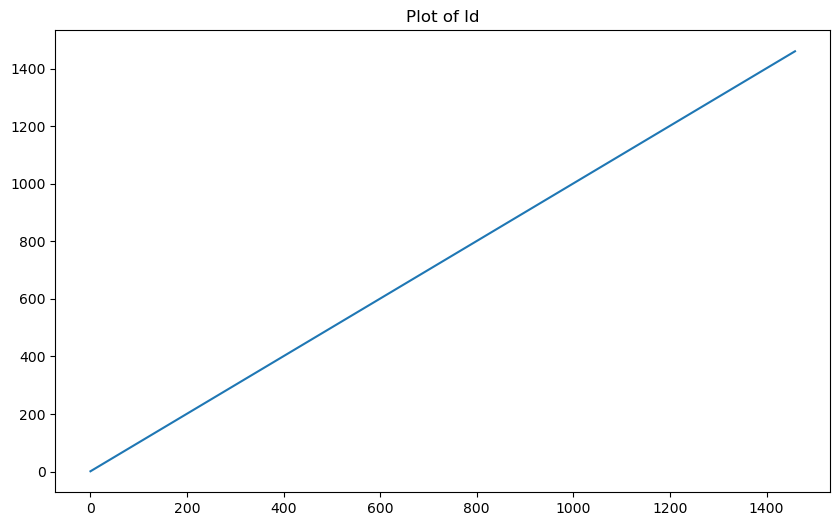

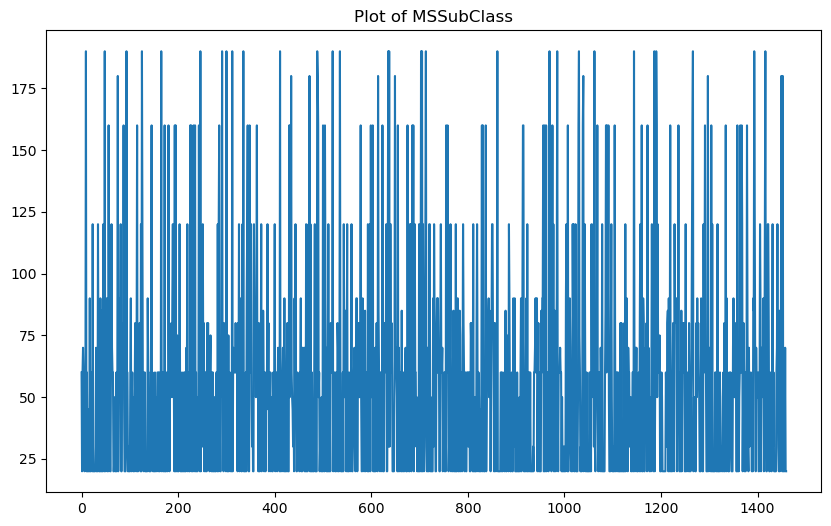

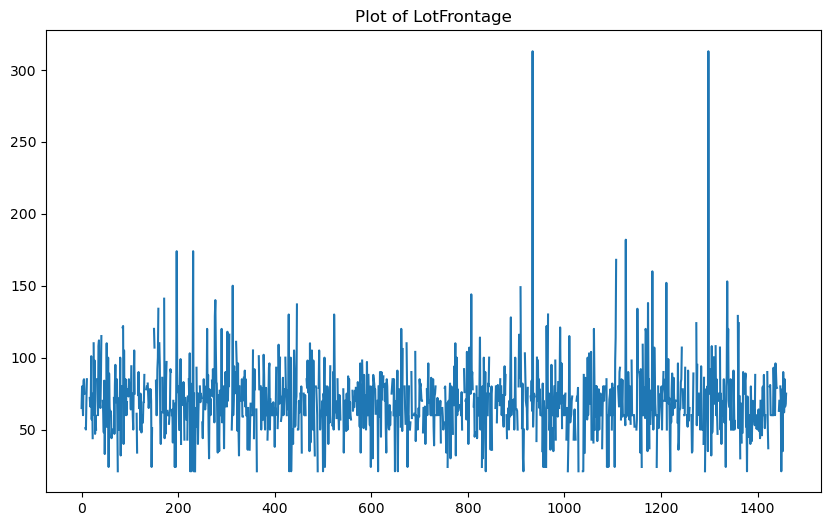

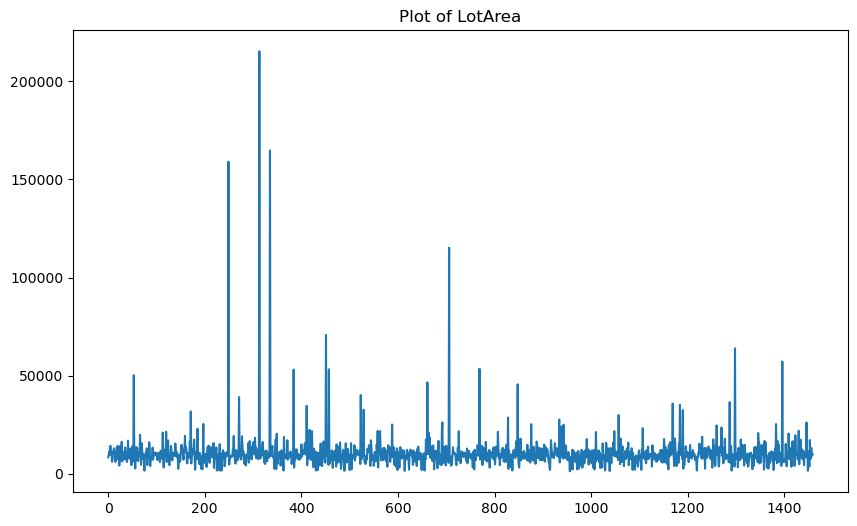

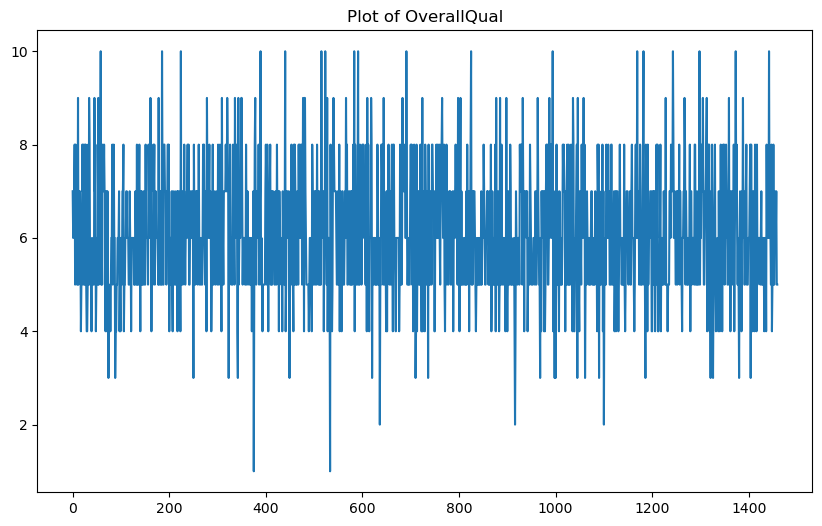

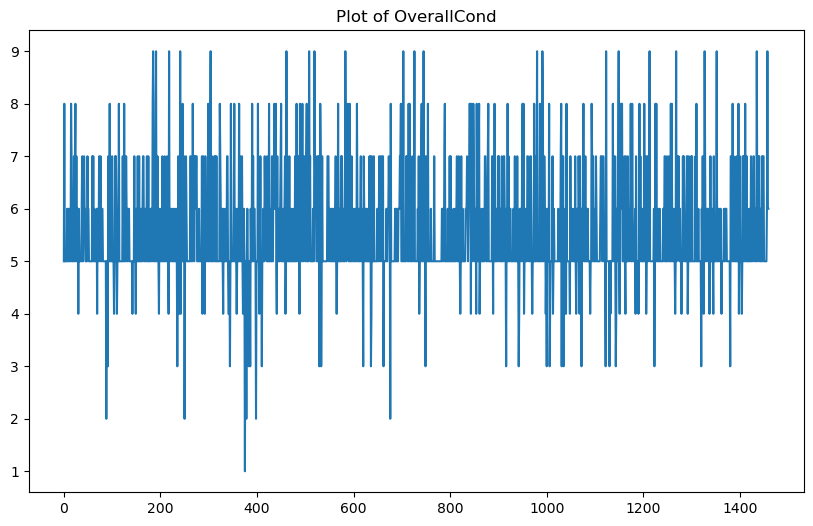

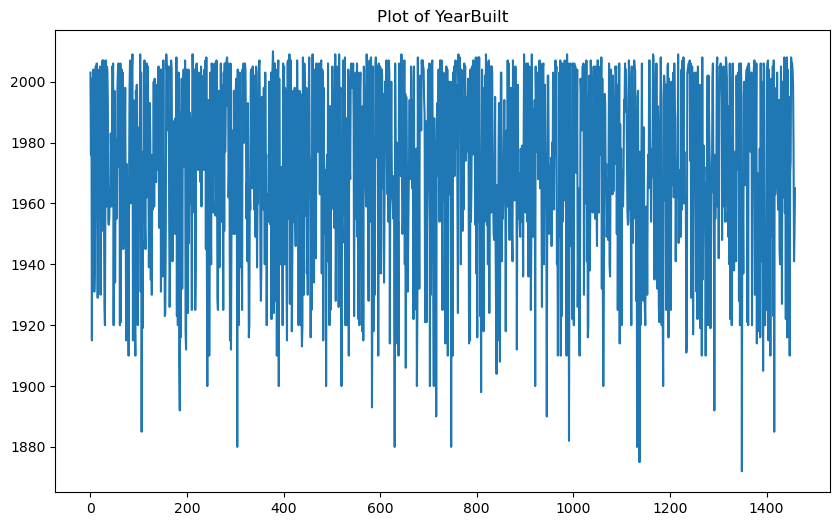

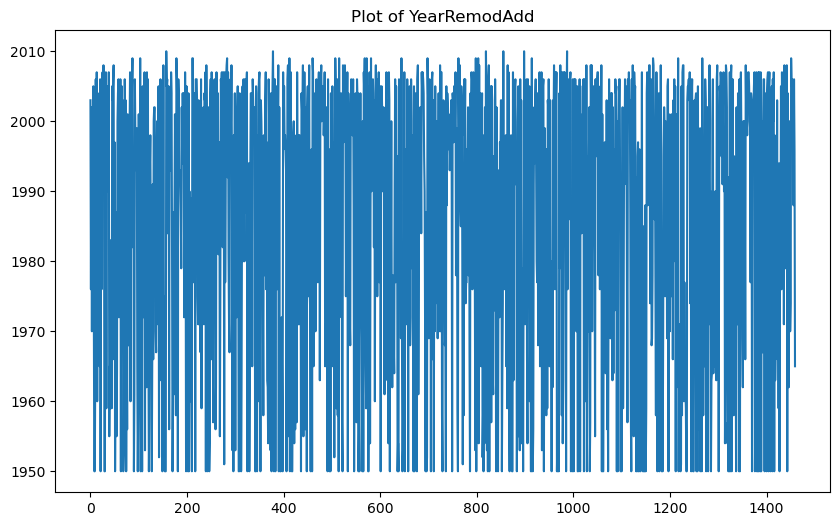

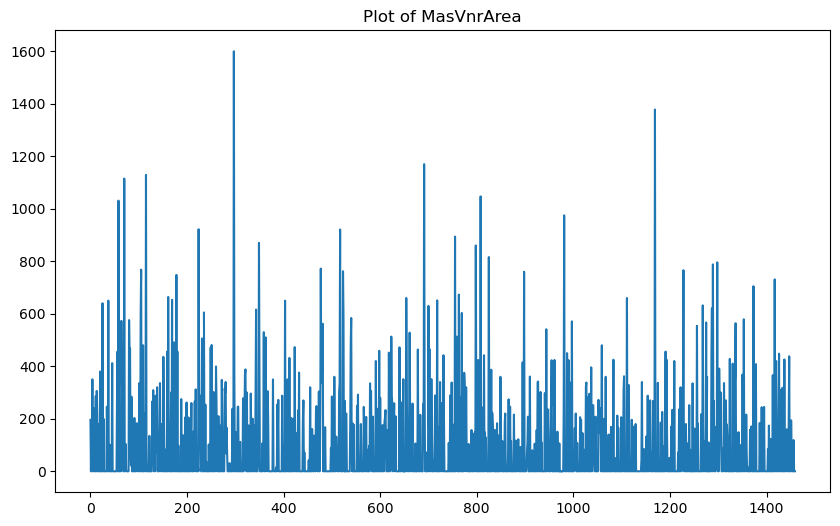

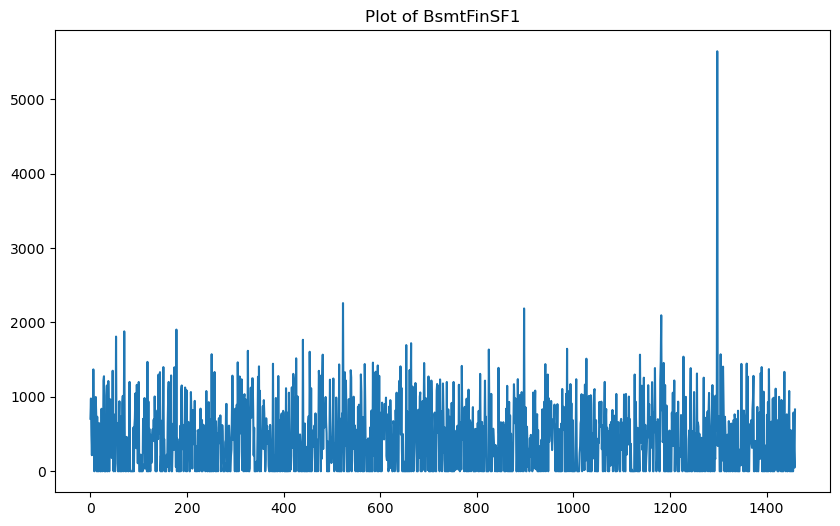

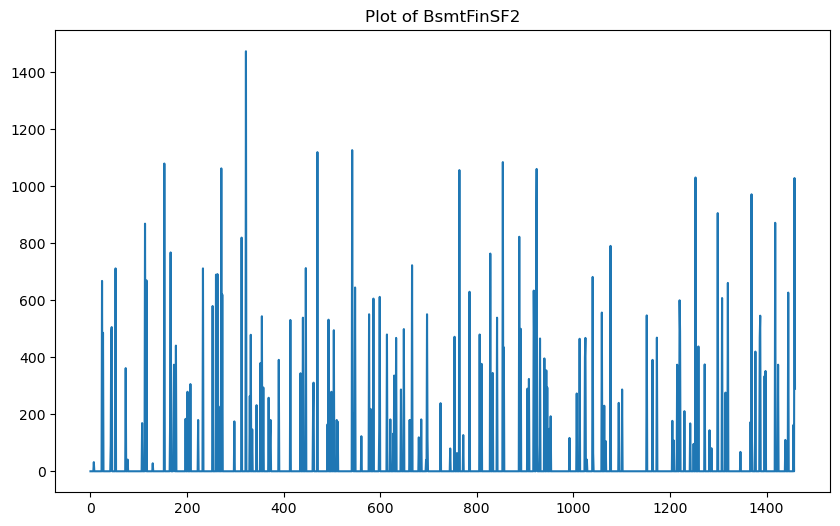

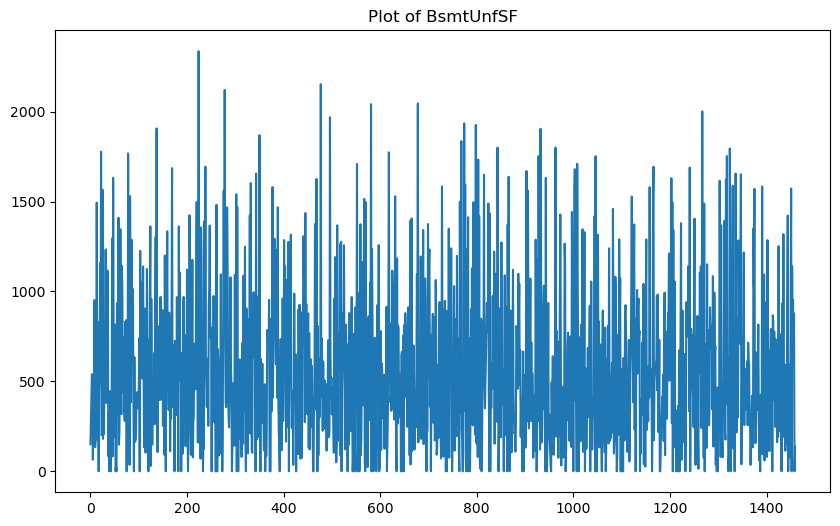

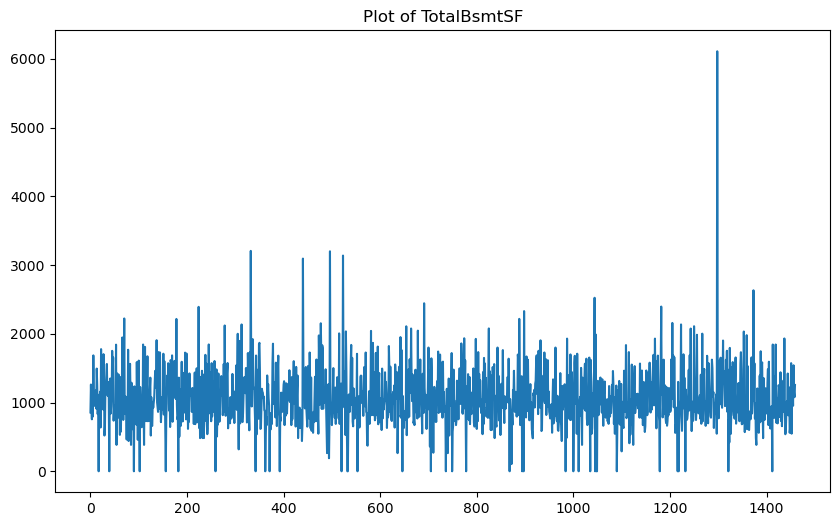

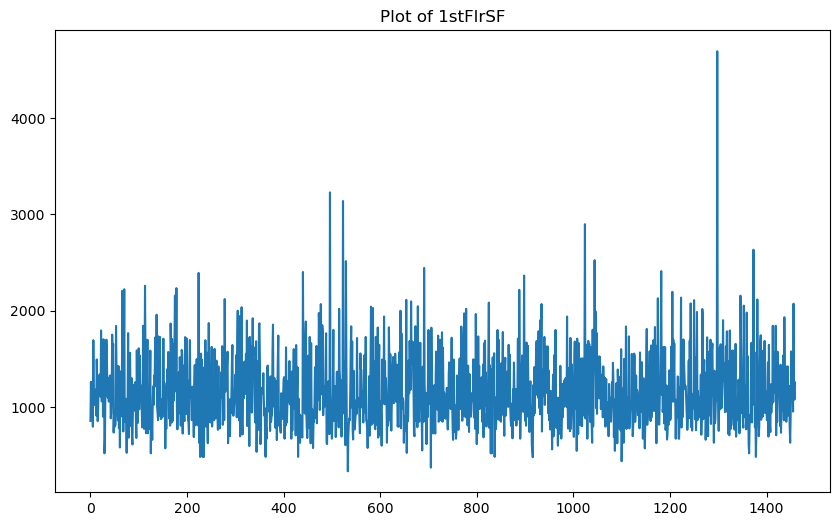

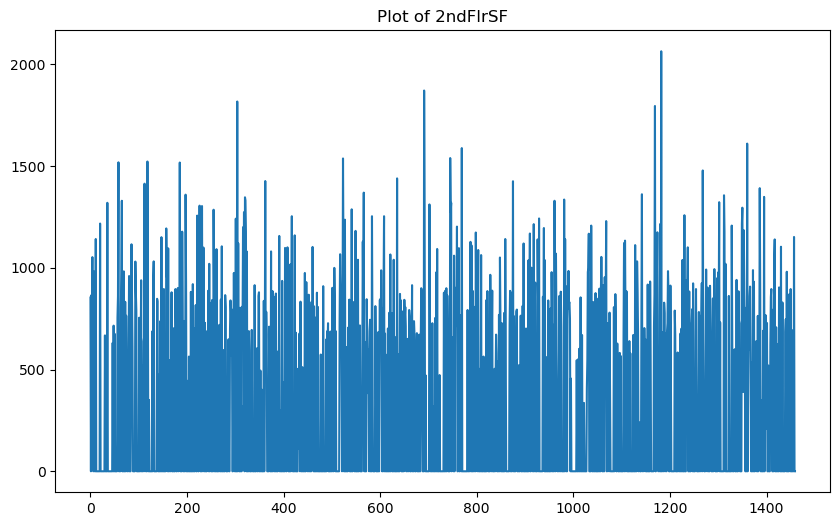

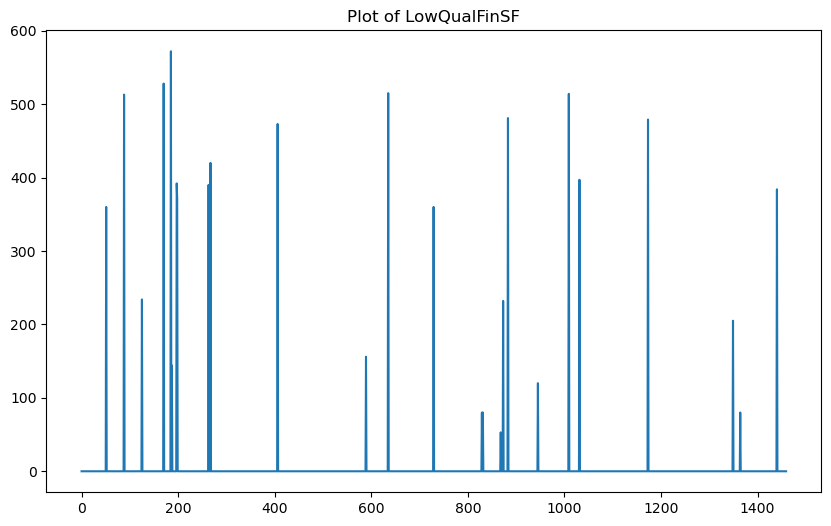

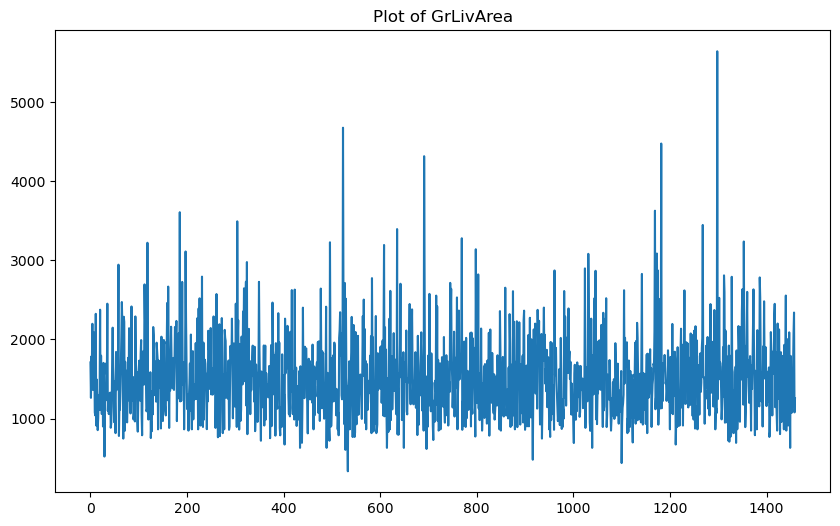

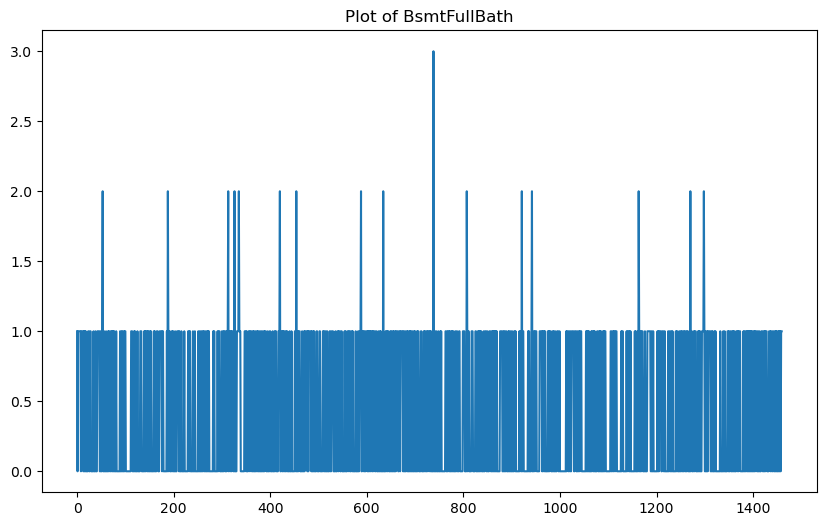

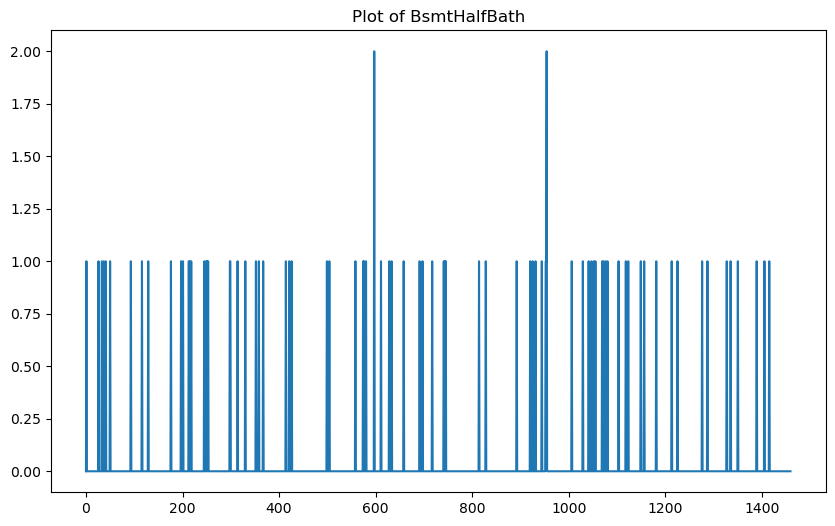

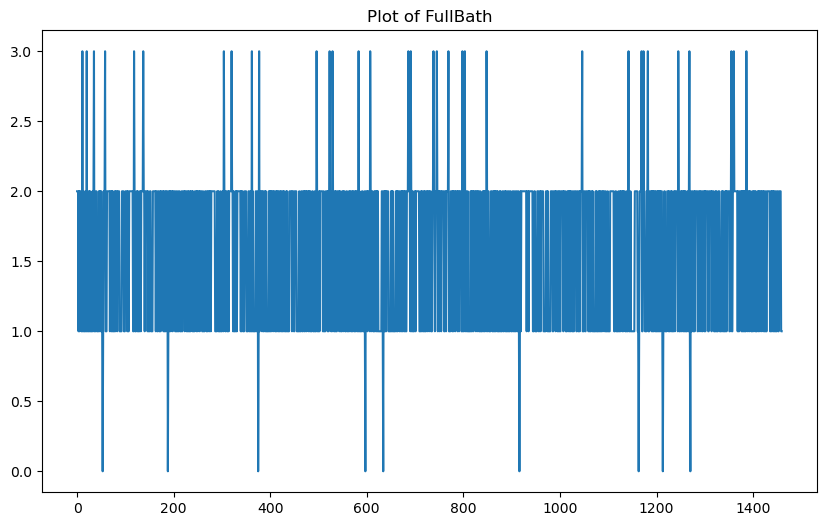

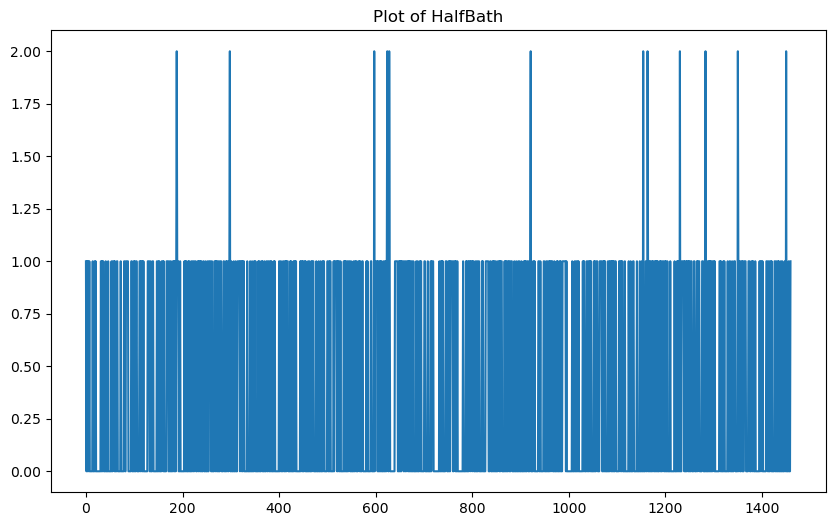

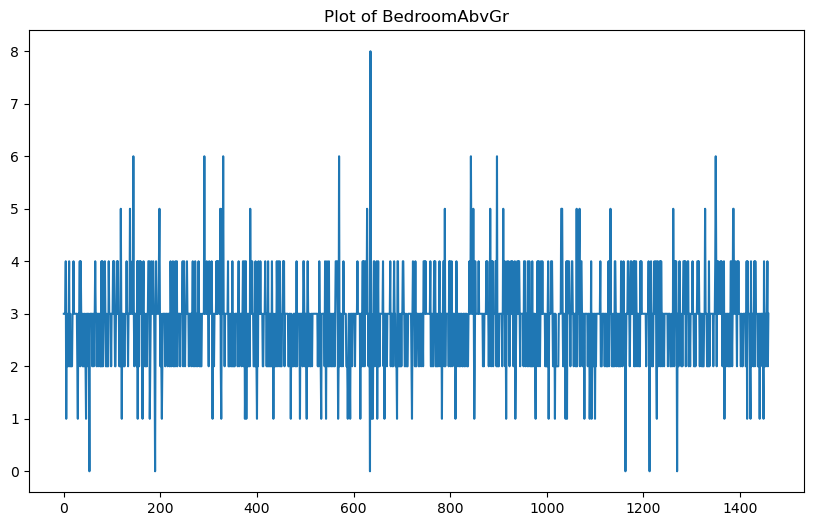

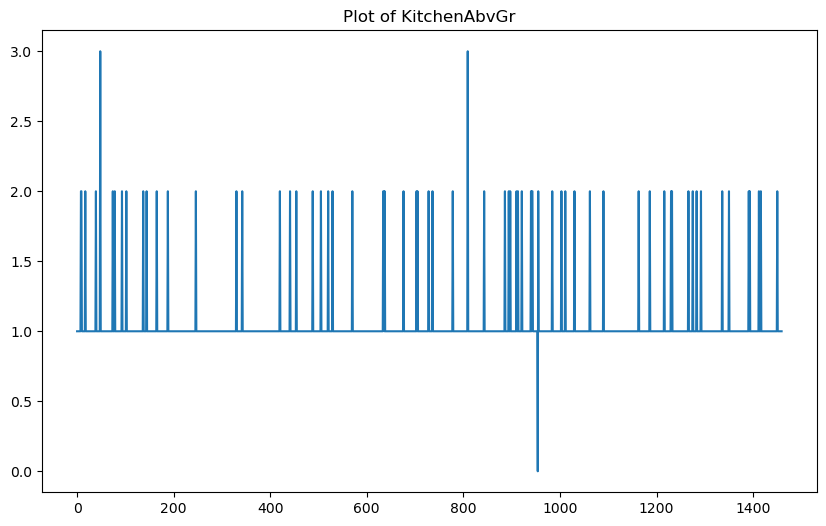

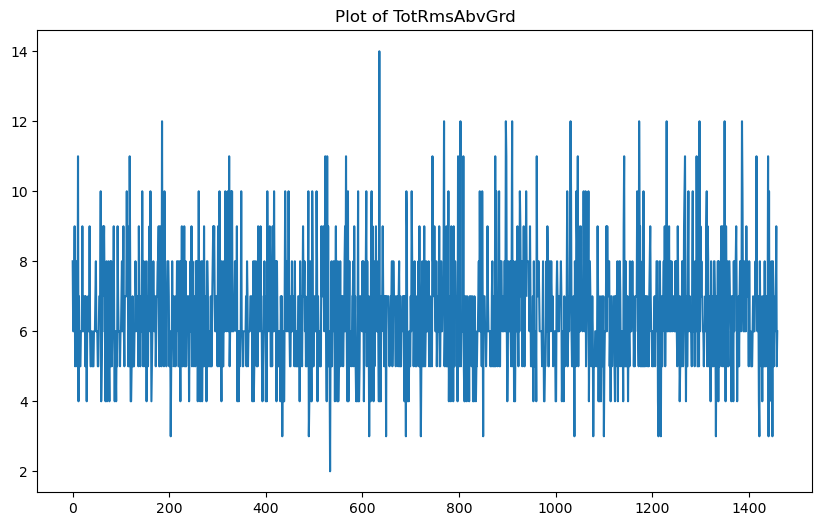

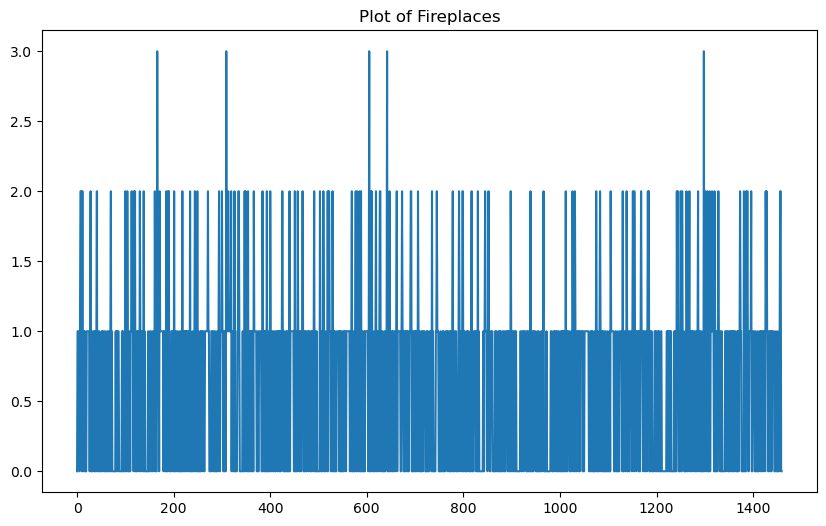

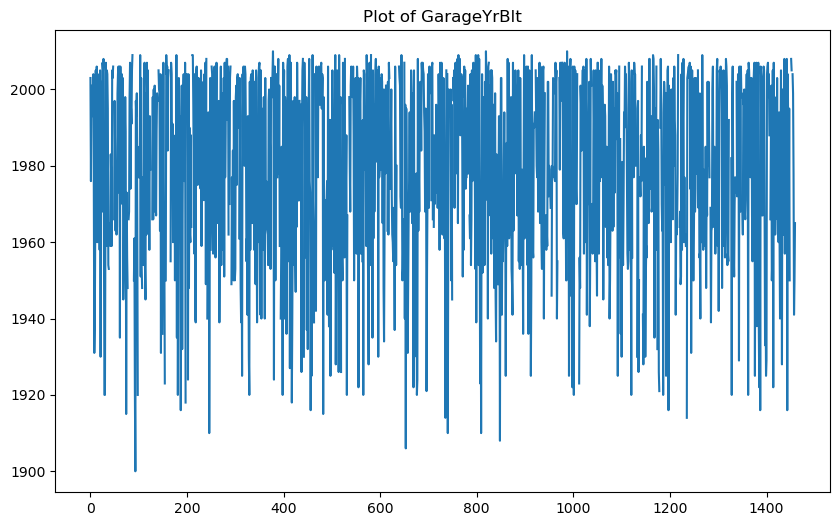

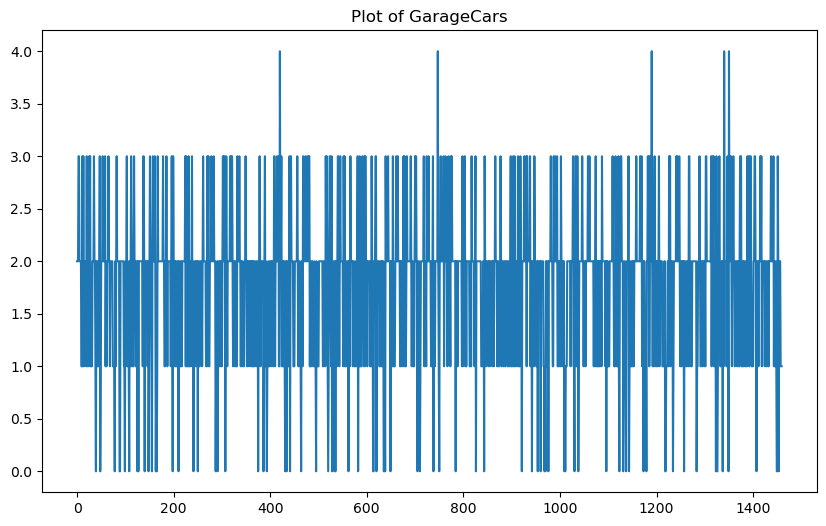

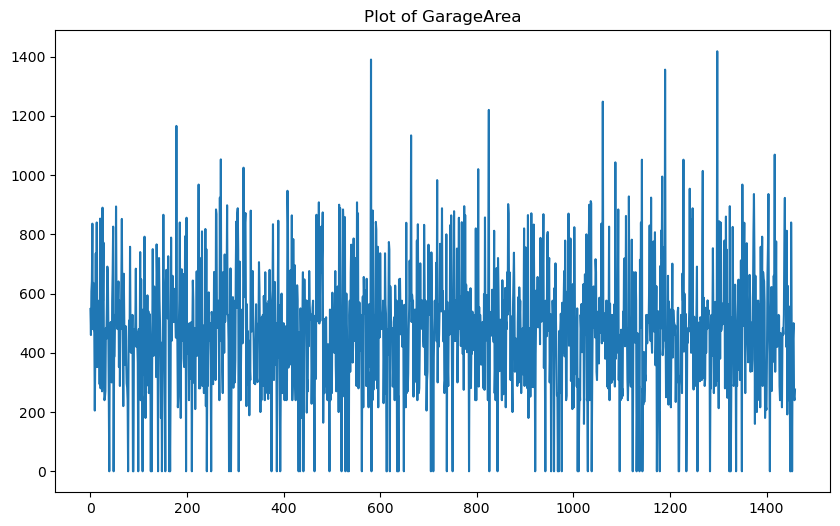

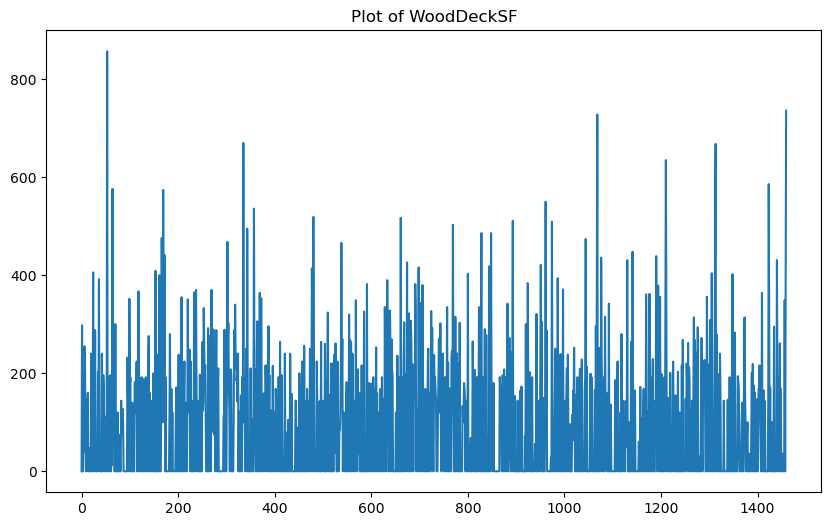

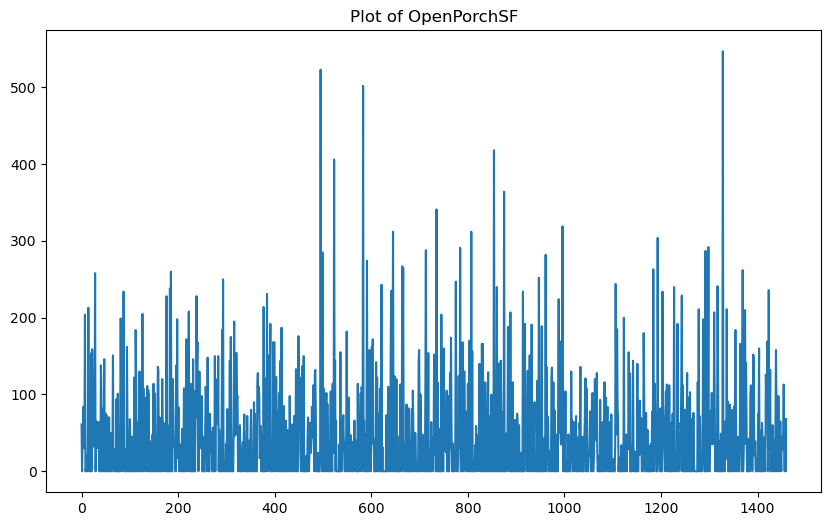

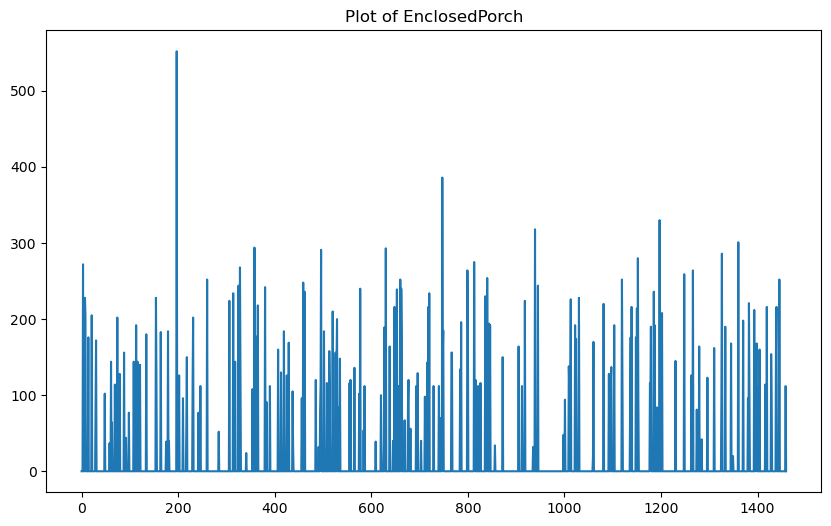

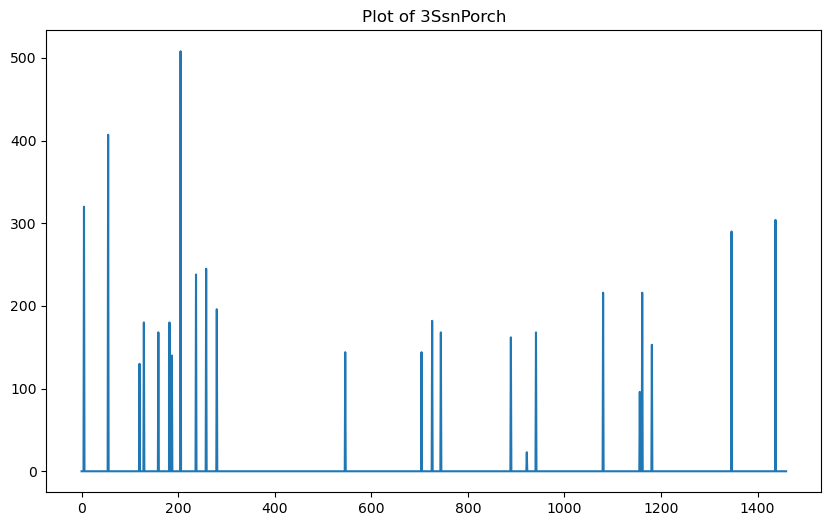

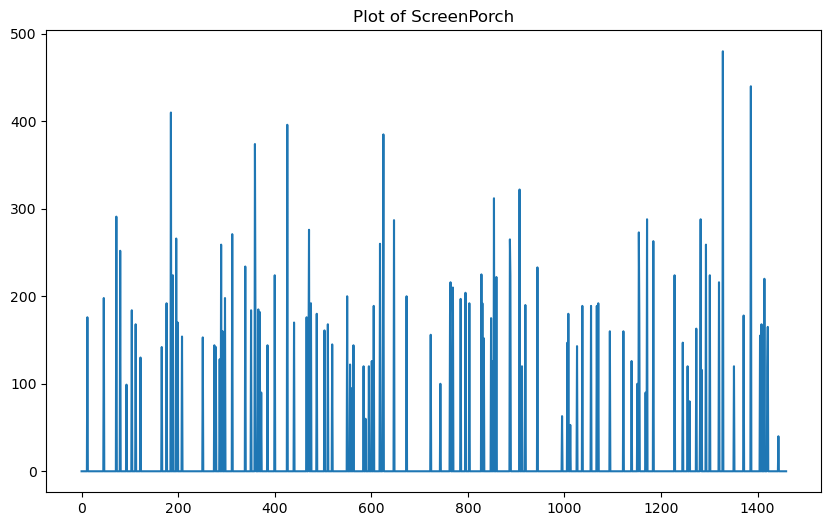

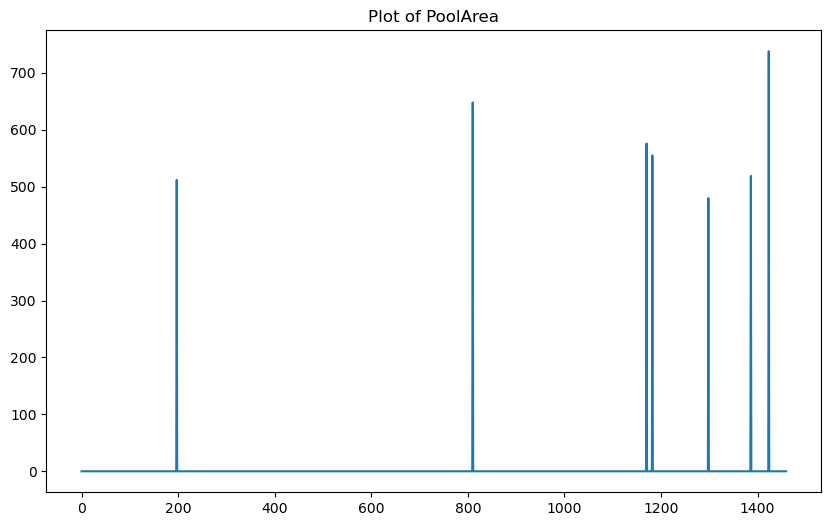

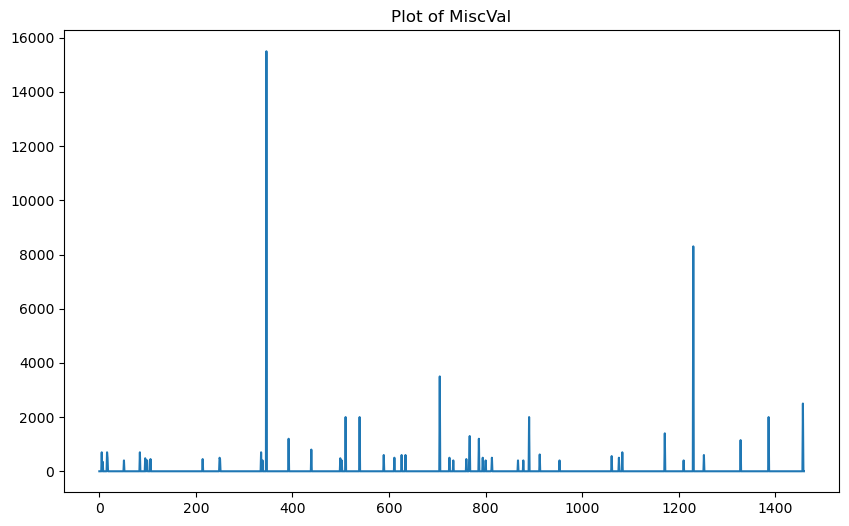

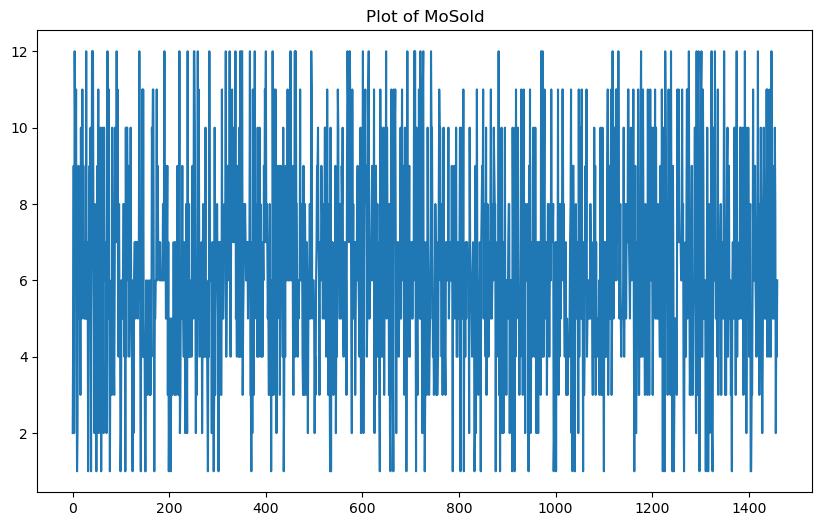

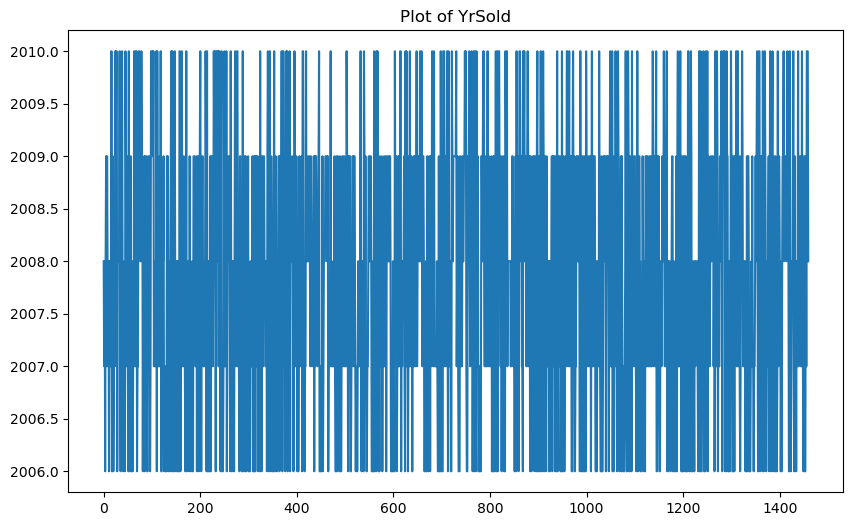

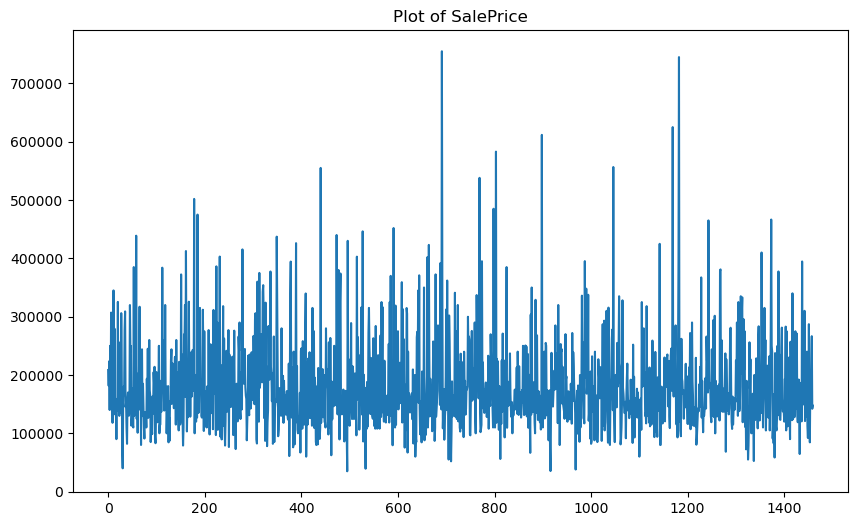

In [7]:

numeric_df = df.select_dtypes(include=[np.number])
for column in numeric_df:
   plt.figure(figsize=(10, 6))
   plt.plot(numeric_df[column])
   plt.title(f'Plot of {column}')
   plt.show()


### Removing large outliers

In [8]:
df = removeOutliers(df,["LotArea","LotFrontage","BsmtFinSF1","TotalBsmtSF","1stFlrSF","EnclosedPorch","MiscVal","MasVnrArea","BsmtFinSF2","BedroomAbvGr"])

In [9]:
df.info(70)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             847 non-null    int64  
 1   MSSubClass     847 non-null    int64  
 2   MSZoning       847 non-null    object 
 3   LotFrontage    847 non-null    float64
 4   LotArea        847 non-null    int64  
 5   Street         847 non-null    object 
 6   Alley          56 non-null     object 
 7   LotShape       847 non-null    object 
 8   LandContour    847 non-null    object 
 9   Utilities      847 non-null    object 
 10  LotConfig      847 non-null    object 
 11  LandSlope      847 non-null    object 
 12  Neighborhood   847 non-null    object 
 13  Condition1     847 non-null    object 
 14  Condition2     847 non-null    object 
 15  BldgType       847 non-null    object 
 16  HouseStyle     847 non-null    object 
 17  OverallQual    847 non-null    int64  
 18  OverallCo

In [10]:
X = df.drop(["SalePrice","Id"],axis=1)
y = df["SalePrice"]

### Finding missing values:

In [11]:
X.columns[X.isna().any()]


Index(['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [12]:
X.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

## Checking correlation:

In [13]:
def checkCorrelation(df, target):
    correlation = df.corr()
    target_corr = correlation[target]
    return target_corr.sort_values()
           

In [14]:
correlations = checkCorrelation(df, "SalePrice")

C:\Users\Eier\AppData\Local\Temp\ipykernel_21260\235506141.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [15]:
print(correlations)

EnclosedPorch   -0.230207
OverallCond     -0.124851
KitchenAbvGr    -0.109061
BsmtFinSF2      -0.084757
LowQualFinSF    -0.070217
MiscVal         -0.068495
MSSubClass      -0.052380
BsmtHalfBath    -0.031203
Id              -0.007990
YrSold          -0.004897
PoolArea         0.010662
3SsnPorch        0.030976
ScreenPorch      0.087609
MoSold           0.106866
BsmtFullBath     0.229287
BsmtUnfSF        0.232699
BedroomAbvGr     0.243077
HalfBath         0.243244
2ndFlrSF         0.249381
WoodDeckSF       0.290499
LotFrontage      0.326277
LotArea          0.341307
BsmtFinSF1       0.341430
OpenPorchSF      0.362370
MasVnrArea       0.385779
Fireplaces       0.394310
TotRmsAbvGrd     0.545739
YearRemodAdd     0.580162
GarageYrBlt      0.589395
1stFlrSF         0.614183
YearBuilt        0.616776
FullBath         0.625564
TotalBsmtSF      0.637344
GarageCars       0.656533
GarageArea       0.657746
GrLivArea        0.728799
OverallQual      0.812776
SalePrice        1.000000
Name: SalePr

In [16]:
# def removeNegativeCorrelations(df, list):
#     for (name,value) in list.items():
#         if name != "SalePrice" and value < -0.1: 
#             df = df.drop(name, axis="columns")
#     return df

In [17]:
# X = removeNegativeCorrelations(X, correlations)

## Find nullvalues, and remove if more than 40% are null, otherwise encode the values.

* Should perform a correlation check to determine if we can drop the values, as opposed to working on the assumption that ~70% of the data missing is enough to discard the data. As the importance of the data itself, may be more valuable than the lack of a complete dataset.

In [18]:
def removeNullValues(df):
    for column in df:
        if df[column].isna().any():
            amountOfNa = df[column].isna().sum()
            pct = amountOfNa / len(df[column]) 
            print(f"Column {column}")
            print(f"Sum: {df[column].isna().sum()}") 
            print(f"pct: {pct}")
            if pct >= 0.8:
                df = df.drop(column,axis="columns")
            else:
                one_hot = pd.get_dummies(df[column], prefix={column}, drop_first=True)
                df = pd.concat([df,one_hot],axis=1)
                df = df.drop(column, axis=1)
    return df            
           

In [19]:
X = removeNullValues(X)

Column Alley
Sum: 791
pct: 0.9338842975206612
Column BsmtQual
Sum: 19
pct: 0.02243211334120425
Column BsmtCond
Sum: 19
pct: 0.02243211334120425
Column BsmtExposure
Sum: 20
pct: 0.023612750885478158
Column BsmtFinType1
Sum: 19
pct: 0.02243211334120425
Column BsmtFinType2
Sum: 19
pct: 0.02243211334120425
Column Electrical
Sum: 1
pct: 0.0011806375442739079
Column FireplaceQu
Sum: 479
pct: 0.5655253837072018
Column GarageType
Sum: 51
pct: 0.0602125147579693
Column GarageYrBlt
Sum: 51
pct: 0.0602125147579693
Column GarageFinish
Sum: 51
pct: 0.0602125147579693
Column GarageQual
Sum: 51
pct: 0.0602125147579693
Column GarageCond
Sum: 51
pct: 0.0602125147579693
Column PoolQC
Sum: 845
pct: 0.9976387249114522
Column Fence
Sum: 683
pct: 0.8063754427390791
Column MiscFeature
Sum: 832
pct: 0.9822904368358913


In [20]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,{'GarageFinish'}_RFn,{'GarageFinish'}_Unf,{'GarageQual'}_Fa,{'GarageQual'}_Gd,{'GarageQual'}_Po,{'GarageQual'}_TA,{'GarageCond'}_Fa,{'GarageCond'}_Gd,{'GarageCond'}_Po,{'GarageCond'}_TA
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,1,0,0,0,1
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,1,0,0,0,1
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,1,1,0,0,0,0,0,0,1


### Encoding non-numeric values:

In [21]:
from sklearn import preprocessing 
from pandas.api.types import is_numeric_dtype
label_encoder = preprocessing.LabelEncoder() 
for column in X:
    if not is_numeric_dtype(X[column]):
        one_hot = pd.get_dummies(X[column], prefix={column}, drop_first=True)
        X = pd.concat([X,one_hot],axis=1)
        X = X.drop(column, axis=1)
        

### Splitting the data into sets:

In [22]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Choosing the model


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [24]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

In [25]:
mean_squared_error(y_test, y_pred, squared=False)

22513.371442942618

In [26]:
r2_score(y_test, y_pred)

0.8396832915936374

In [27]:
en = ElasticNet()
en.fit(X_train, y_train)

c:\Users\Eier\anaconda3\envs\dat158\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.433e+11, tolerance: 2.374e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [28]:
mean_squared_error(y_test, en.predict(X_test), squared=False)

20859.044421977913

In [29]:
r2_score(y_test, en.predict(X_test))

0.8623784224182842

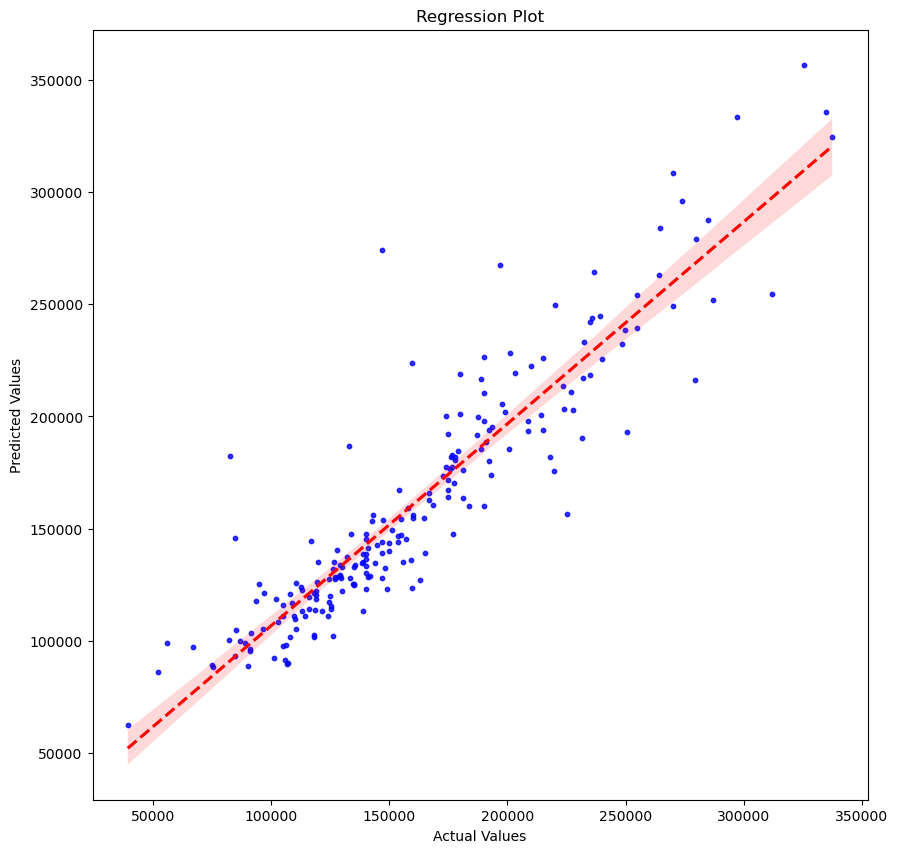

In [30]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue', 's': 10}, line_kws={'color': 'red', 'linestyle': '--'})
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Regression Plot')
plt.show()

In [31]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=0) 
xgb.fit(X_train, y_train)
mean_squared_error(y_test, xgb.predict(X_test), squared=False)

23764.954014398907

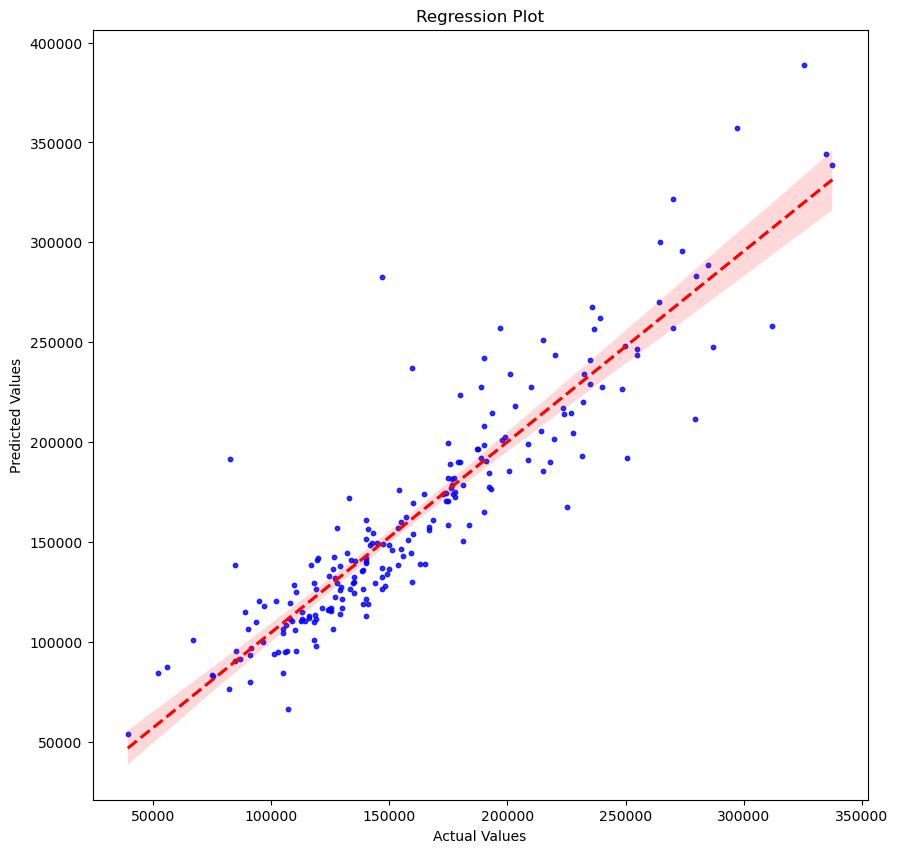

In [32]:
y_pred = xgb.predict(X_test)
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue', 's': 10}, line_kws={'color': 'red', 'linestyle': '--'})
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Regression Plot')
plt.show()

In [33]:
lst = []
for col in ["OverallQual","GrLivArea","GarageArea","TotalBsmtSF", "FullBath", "YearBuilt", "Fireplaces"]:
    
    lst.append(col)
print (*lst, sep =', ') 
print(lst)

OverallQual, GrLivArea, GarageArea, TotalBsmtSF, FullBath, YearBuilt, Fireplaces
['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'Fireplaces']


In [34]:
r2_score(y_test, y_pred)

0.8213628955939526

In [35]:
import gradio as gr

In [36]:
def createSlider(feature,lst):
    return gr.components.Slider(minimum=lst[0], maximum=lst[1], value=lst[2], label=feature)

In [37]:
def createDropDown(feature,list):
    return gr.component.DropDown(list, label=feature)

In [38]:
def predictHousingPrices(LotArea,OverallQual, GrLivArea, GarageArea,GarageCars, TotalBsmtSF, FullBath, YearBuilt, Fireplaces):
    df = X
    user_defined_columns = ["LotArea","OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF", "FullBath", "YearBuilt", "Fireplaces"]

    # Kolonnene du vil beregne gjennomsnittet av
    mean_value_columns = [col for col in df.columns if col not in user_defined_columns]        
    input_df = X.copy()
    
    input_df["LotArea"] = LotArea
    input_df["OverallQual"] = OverallQual
    input_df["GrLivArea"] = GrLivArea
    input_df["GarageArea"] = GarageArea
    input_df["GarageCars"] = GarageCars
    input_df["TotalBsmtSF"] = TotalBsmtSF
    input_df["FullBath"] = FullBath
    input_df["YearBuilt"] = YearBuilt
    input_df["Fireplaces"] = Fireplaces
    
    # Sett mean-verdien eller modus for kolonner som ikke er brukerdefinerte
    for column in mean_value_columns:
        if input_df[column].dtype == 'O':  # Kategorisk kolonne
            mode_value = df[column].mode().iloc[0]
            input_df[column] = mode_value
        else:  # Numerisk kolonne
            mean_value = df[column].mean()
            input_df[column] = mean_value

    prediction = en.predict(input_df)

    return prediction[0]

In [39]:
def createInputs(features):
    int = []
    for val in features:
            print(val[0])
            my_list = list(val)
            val = tuple(my_list)
            print(val)
            int.append(createSlider(val[0],val[1]))
    return int

In [40]:
def minMax(data,feature):
    
    min = data[feature].min()
    max = data[feature].max()
    default = data[feature].mean()
    print(f"ft: {feature}  min: {min}  max: {max}  default: {default}")
    return [min,max,default]

In [41]:
def createValues(data,features):
    values = []
    print(features)
    for val in features:
        
        minMaxValues = minMax(data,""+val)
        print(minMaxValues)
        values.append((val,minMaxValues))
    
    return values

In [43]:
iface = gr.Interface(
    fn=predictHousingPrices, 
    inputs= createInputs(createValues(X,["LotArea","OverallQual","GrLivArea","GarageArea","GarageCars","TotalBsmtSF", "FullBath", "YearBuilt", "Fireplaces"])), 
    outputs=gr.components.Textbox(label="Prediction"),
    title="Housing price predictor",
    description="""Enter the values to predict housing prices"""
)

# Launch the interface
iface.launch(share=True)

['OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'Fireplaces']
ft: OverallQual  min: 1  max: 10  default: 5.9374262101534825
[1, 10, 5.9374262101534825]
ft: GrLivArea  min: 334  max: 3493  default: 1340.6280991735537
[334, 3493, 1340.6280991735537]
ft: GarageArea  min: 0  max: 1053  default: 445.08854781582056
[0, 1053, 445.08854781582056]
ft: GarageCars  min: 0  max: 4  default: 1.6717827626918536
[0, 4, 1.6717827626918536]
ft: TotalBsmtSF  min: 0  max: 1795  default: 987.2680047225501
[0, 1795, 987.2680047225501]
ft: FullBath  min: 0  max: 3  default: 1.4805194805194806
[0, 3, 1.4805194805194806]
ft: YearBuilt  min: 1875  max: 2009  default: 1971.237308146399
[1875, 2009, 1971.237308146399]
ft: Fireplaces  min: 0  max: 3  default: 0.4757969303423849
[0, 3, 0.4757969303423849]
OverallQual
('OverallQual', [1, 10, 5.9374262101534825])
GrLivArea
('GrLivArea', [334, 3493, 1340.6280991735537])
GarageArea
('GarageArea', [0, 1053, 445.088547815